In [23]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import datasets, models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Set the batch size, number of epochs

batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape) #(images, pixels, pixels, RGB)
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0], 'Test samples')

x_train shape: (50000, 32, 32, 3)
50000 Train samples
10000 Test samples


In [6]:
# Print the shape of dataset
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'Train samples')
print(y_test.shape[0], 'Test samples')

y_train shape: (50000, 1)
50000 Train samples
10000 Test samples


#### Labels:
* **Airplane : 0**
* **Automobile: 1**
* **Bird : 2**
* **Cat : 3**
* **Deer : 4**
* **Dog : 5**
* **Frog : 6**
* **Horse : 7**
* **Ship : 8**
* **Truck : 9**

In [7]:
x_train[0, :, :, :].shape

(32, 32, 3)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

* The training set contains 50000 images
* The size of each image is 32x32 pixels
* Each image has 3 color channels

In [58]:
y_train.shape

(50000, 10)

In [59]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [10]:
y_train[0][0]

6

* The label of image at index = 0 is 6: "frog"

In [11]:
label_dict = {0:'airplane',
              1:'automobile',
              2:'bird',
              3:'cat',
              4:'deer',
              5:'dog',
              6:'dog',
              7:'horse',
              8:'ship',
              9:'truck'}

Label 
 Label Id: 5 
 Name: dog


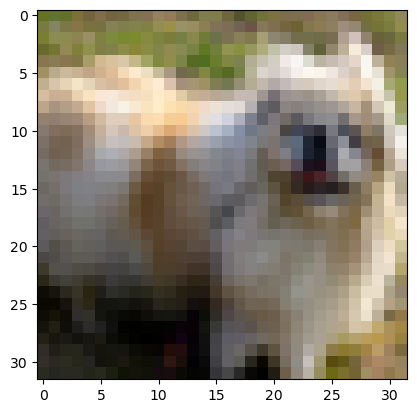

In [12]:
i = 40
image = x_train[i]
label = y_train[i][0]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image)

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
# Convert labels to one hot vectors

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [15]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [16]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
x_train.shape[1:]

(32, 32, 3)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        2

In [19]:
opt = optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)

In [20]:
# Compiling the model

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [22]:
x_train = x_train.astype('float32')
x_train /= 255.0
x_test = x_test.astype('float32')
x_test /= 255.0

In [26]:
# Adding early stopping callbacks to fit the function is going to stop the training
# if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10)

# Adding Model checkpoint to the fit function is going to save the weights whenever val_loss achieves a new low value

model_checkpoint = ModelCheckpoint('cifar_cnn_checkpoint.h5',
                                   monitor = 'val_loss',
                                   verbose = 1,
                                   save_best_only = True,
                                   save_weights_only = True,
                                   mode = 'auto',
                                   period = 1)

In [27]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [32]:
x_test.shape

(10000, 32, 32, 3)

Epoch 1/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.9148 - accuracy: 0.3058
Epoch 1: val_loss improved from inf to 1.88260, saving model to cifar_cnn_checkpoint.h5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.9146 - accuracy: 0.3059 - val_loss: 1.8826 - val_accuracy: 0.3796
Epoch 2/100
1563/1563 [==============================] - ETA: 0s - loss: 1.5417 - accuracy: 0.4371
Epoch 2: val_loss improved from 1.88260 to 1.36972, saving model to cifar_cnn_checkpoint.h5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5417 - accuracy: 0.4371 - val_loss: 1.3697 - val_accuracy: 0.5134
Epoch 3/100
1563/1563 [==============================] - ETA: 0s - loss: 1.3634 - accuracy: 0.5077
Epoch 3: val_loss improved from 1.36972 to 1.15904, saving model to cifar_cnn_checkpoint.h5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3634 - accuracy: 0.5077 - val_loss: 1.1590 - val_accuracy: 0.5816
Epoch 4/100
1562/1563 [===

1563/1563 [==============================] - 79s 50ms/step - loss: 0.7452 - accuracy: 0.7433 - val_loss: 0.6368 - val_accuracy: 0.7795
Epoch 29/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7463 - accuracy: 0.7432
Epoch 29: val_loss did not improve from 0.63168
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7462 - accuracy: 0.7433 - val_loss: 0.6490 - val_accuracy: 0.7732
Epoch 30/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7387 - accuracy: 0.7454
Epoch 30: val_loss did not improve from 0.63168
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7388 - accuracy: 0.7453 - val_loss: 0.6334 - val_accuracy: 0.7805
Epoch 31/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7350 - accuracy: 0.7477
Epoch 31: val_loss did not improve from 0.63168
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7349 - accuracy: 0.7477 - val_loss: 0.8769 - val_accuracy: 0.7162
Epoch 32/100
156

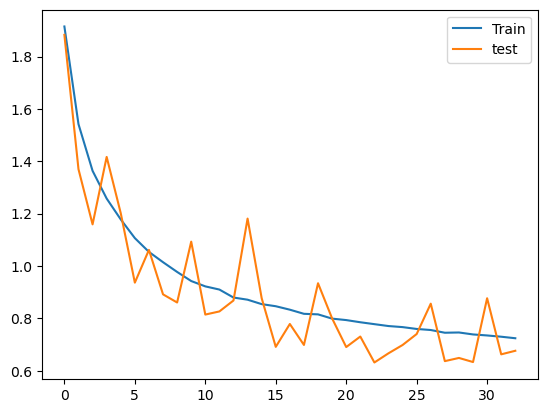

In [33]:
# model fit
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = 100,
                    validation_data = (x_test, y_test),
                    shuffle = True,
                    verbose = 1,
                    callbacks = [early_stopping, model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label ='Train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [34]:
# Score the trained model
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.6764 - accuracy: 0.7678
Test loss: 0.676356315612793
Test accuracy: 0.767799973487854


In [35]:
 predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [36]:
preds = pd.DataFrame(predictions)
preds

,0,1,2,3,4,5,6,7,8,9
0,1.237976e-02,2.287035e-03,0.013520,0.681121,6.588453e-03,1.970868e-01,5.340746e-02,5.708480e-03,2.157722e-02,6.323420e-03
1,2.192788e-03,8.823156e-03,0.000001,0.000003,1.084283e-07,2.540300e-08,2.223904e-07,3.449281e-08,9.881415e-01,8.384021e-04
2,3.832682e-02,7.392004e-03,0.000344,0.000728,3.042923e-04,2.729898e-05,7.420016e-05,5.572789e-05,9.420263e-01,1.072051e-02
3,8.757469e-02,2.380484e-03,0.001492,0.001013,2.776239e-04,8.470535e-06,1.136356e-04,6.606492e-06,9.046888e-01,2.445455e-03
4,7.949860e-05,4.288205e-04,0.018150,0.005711,3.848309e-03,1.780804e-04,9.711795e-01,1.776442e-05,3.852469e-04,2.204033e-05
...,...,...,...,...,...,...,...,...,...,...
9995,1.442530e-01,5.282889e-03,0.026118,0.330549,2.888462e-02,4.200820e-02,6.429572e-03,1.404683e-02,3.961086e-01,6.318788e-03
9996,2.131704e-04,3.600650e-06,0.117510,0.313934,7.483591e-02,7.300813e-02,4.177041e-01,2.742201e-03,2.153838e-05,2.740075e-05
9997,1.035010e-06,5.441746e-09,0.001075,0.012086,1.425487e-04,9.854690e-01,6.955562e-05,1.156197e-03,2.813060e-07,3.583016e-07
9998,8.434246e-02,2.072755e-01,0.030991,0.029799,5.986728e-01,1.019208e-02,2.659009e-02,3.228009e-03,2.191364e-03,6.717925e-03


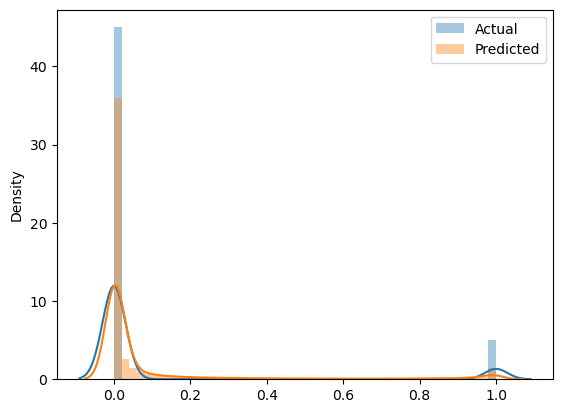

In [57]:
import seaborn as sns
sns.distplot(y_test, label = 'Actual')
sns.distplot(preds, label = 'Predicted')
plt.legend()
plt.show()